# Análisis del Sistema de Lorenz

## 4.1 Análisis de los Puntos Fijos del Sistema de Lorenz

### Deducción Completa de los Puntos de Equilibrio

El sistema de Lorenz está definido por las siguientes ecuaciones diferenciales:

$$
\begin{cases}
\dot{x} = \sigma(y - x) \\
\dot{y} = x(\rho - z) - y \\
\dot{z} = xy - \beta z
\end{cases}
$$

**Paso 1: Condición de punto fijo**  
Un punto fijo $(x^*, y^*, z^*)$ satisface $\dot{x} = \dot{y} = \dot{z} = 0$:

$$
\begin{cases}
0 = \sigma(y^* - x^*) \quad (1) \\
0 = x^*(\rho - z^*) - y^* \quad (2) \\
0 = x^*y^* - \beta z^* \quad (3)
\end{cases}
$$

**Paso 2: Resolución del sistema algebraico**  
De (1):  
$$ y^* = x^* $$

Sustituyendo $y^*$ en (3):  
$$ 0 = x^{*2} - \beta z^* \implies z^* = \frac{x^{*2}}{\beta} \quad (4) $$

Sustituyendo (1) y (4) en (2):  
$$ 0 = x^*\left(\rho - \frac{x^{*2}}{\beta}\right) - x^* = x^*\left(\rho - 1 - \frac{x^{*2}}{\beta}\right) $$

Esto da dos casos:

### Caso 1: Punto trivial ($x^* = 0$)
$$ x^* = y^* = 0 \implies z^* = 0 $$

**Punto fijo**: $C_0 = (0, 0, 0)$

### Caso 2: Puntos no triviales ($x^* \neq 0$)
$$ \rho - 1 - \frac{x^{*2}}{\beta} = 0 \implies x^* = \pm\sqrt{\beta(\rho - 1)} $$

Usando (1) y (4):  
$$ y^* = \pm\sqrt{\beta(\rho - 1)}, \quad z^* = \rho - 1 $$

**Puntos fijos**:  
$$ C_+ = \left(\sqrt{\beta(\rho - 1)}, \sqrt{\beta(\rho - 1)}, \rho - 1\right) $$
$$ C_- = \left(-\sqrt{\beta(\rho - 1)}, -\sqrt{\beta(\rho - 1)}, \rho - 1\right) $$

**Condición de existencia**: $\rho > 1$ (para raíces reales)

### Análisis de Estabilidad Lineal

**Paso 3: Matriz Jacobiana**  
La matriz Jacobiana general es:

$$
J = \begin{bmatrix}
-\sigma & \sigma & 0 \\
\rho - z & -1 & -x \\
y & x & -\beta
\end{bmatrix}
$$

### Análisis para $C_0 = (0,0,0)$:
$$
J(C_0) = \begin{bmatrix}
-\sigma & \sigma & 0 \\
\rho & -1 & 0 \\
0 & 0 & -\beta
\end{bmatrix}
$$

**Ecuación característica**:  
$$
\det(J - \lambda I) = \begin{vmatrix}
-\sigma - \lambda & \sigma & 0 \\
\rho & -1 - \lambda & 0 \\
0 & 0 & -\beta - \lambda
\end{vmatrix} = 0
$$

Esto se factoriza como:  
$$
(-\beta - \lambda)\left[(-\sigma - \lambda)(-1 - \lambda) - \sigma\rho\right] = 0
$$

**Primer eigenvalor**: $\lambda_1 = -\beta$

**Ecuación cuadrática restante**:  
$$
\lambda^2 + (\sigma + 1)\lambda + \sigma(1 - \rho) = 0
$$

Solución:  
$$
\lambda_{2,3} = \frac{-(\sigma+1) \pm \sqrt{(\sigma+1)^2 - 4\sigma(1-\rho)}}{2}
$$

**Comportamiento según parámetros**:
1. Para $\rho < 1$: Todos los eigenvalores son reales y negativos (nodo estable)
2. Para $\rho > 1$:  
   - Un eigenvalor real negativo ($\lambda_1 = -\beta$)  
   - Dos eigenvalores con signos opuestos (punto de silla)

**Ejemplo numérico ($\sigma=10$, $\rho=28$, $\beta=8/3$)**:
$$
\lambda_1 = -8/3 \approx -2.6667
$$
$$
\lambda_{2,3} \approx 11.8277, -22.8277
$$

**Conclusión**: $C_0$ es un **punto de silla inestable** para parámetros caóticos.

### Análisis para $C_+$ y $C_-$ (puntos no triviales)

Para $C_+ = (x^*, x^*, \rho-1)$ con $x^* = \sqrt{\beta(\rho-1)}$:

$$
J(C_+) = \begin{bmatrix}
-\sigma & \sigma & 0 \\
1 & -1 & -x^* \\
x^* & x^* & -\beta
\end{bmatrix}
$$

**Ecuación característica**:
$$
\lambda^3 + (\sigma + \beta + 1)\lambda^2 + \beta(\sigma + \rho)\lambda + 2\sigma\beta(\rho - 1) = 0
$$

**Criterio de Routh-Hurwitz**:  
Para estabilidad, se requiere:
1. Todos los coeficientes positivos (cumplido para $\rho > 1$)
2. El determinante:
$$
(\sigma + \beta + 1)(\sigma + \rho) > 2\sigma(\rho - 1)
$$

**Umbral de inestabilidad**:  
Cuando $\rho > \rho_c = \sigma\left(\frac{\sigma + \beta + 3}{\sigma - \beta - 1}\right)$

Para parámetros clásicos ($\sigma=10$, $\beta=8/3$):
$$
\rho_c \approx 24.7368
$$

Como $\rho = 28 > \rho_c$, los puntos $C_+$ y $C_-$ son **inestables** (dos eigenvalores complejos con parte real positiva y uno real negativo).

### Diagrama de Bifurcación

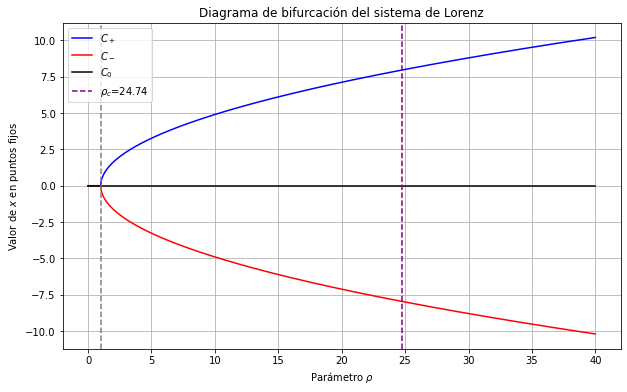

In [8]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 10
beta = 8/3
rho_values = np.linspace(0, 40, 1000)

# Cálculo de puntos fijos
x_plus = np.zeros_like(rho_values)
valid = rho_values > 1
x_plus[valid] = np.sqrt(beta * (rho_values[valid] - 1))
x_minus = -x_plus
z_eq = np.where(rho_values > 1, rho_values-1, 0)

# Umbral de inestabilidad
rho_c = sigma*(sigma + beta + 3)/(sigma - beta - 1)

plt.figure(figsize=(10,6))
plt.plot(rho_values, x_plus, 'b', label='$C_+$')
plt.plot(rho_values, x_minus, 'r', label='$C_-$')
plt.plot(rho_values, np.zeros_like(rho_values), 'k', label='$C_0$')
plt.axvline(x=1, color='gray', linestyle='--')
plt.axvline(x=rho_c, color='purple', linestyle='--', 
            label=f'$ρ_c$={rho_c:.2f}')
plt.title('Diagrama de bifurcación del sistema de Lorenz')
plt.xlabel('Parámetro $ρ$')
plt.ylabel('Valor de $x$ en puntos fijos')
plt.legend()
plt.grid(True)
plt.show()

### Interpretación Física

1. **Punto $C_0$**:
   - Representa estado sin convección en el modelo atmosférico original.
   - Inestable para $\rho > 1$: pequeñas perturbaciones crecen.

2. **Puntos $C_+$ y $C_-$**:
   - Representan convección en sentidos opuestos.
   - Para $\rho > \rho_c$, la inestabilidad conduce a órbitas caóticas.
   - Los eigenvalores complejos indican comportamiento espiral.

3. **Transición a caos**:
   - Cuando $\rho$ cruza $\rho_c$, los puntos fijos pierden estabilidad.
   - El sistema no puede estabilizarse en ningún punto fijo, dando lugar al atractor extraño.

## 4.2 Divergencia del Campo Vectorial

### Derivación Matemática Completa

Para el sistema de Lorenz definido por:
$$
\vec{F} = \begin{pmatrix}
\sigma(y - x) \\
x(\rho - z) - y \\
xy - \beta z
\end{pmatrix}
$$

La divergencia se calcula como:
$$
\nabla \cdot \vec{F} = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} + \frac{\partial F_z}{\partial z}
$$

Calculamos cada término por separado:

1. **Primer componente**:
$$
\frac{\partial}{\partial x} [\sigma(y - x)] = \sigma(0 - 1) = -\sigma
$$

2. **Segundo componente**:
$$
\frac{\partial}{\partial y} [x(\rho - z) - y] = 0 - 1 = -1
$$

3. **Tercer componente**:
$$
\frac{\partial}{\partial z} [xy - \beta z] = 0 - \beta = -\beta
$$

Sumando los tres términos:
$$
\nabla \cdot \vec{F} = -\sigma - 1 - \beta = -(\sigma + 1 + \beta)
$$

### Visualización Geométrica de la Divergencia

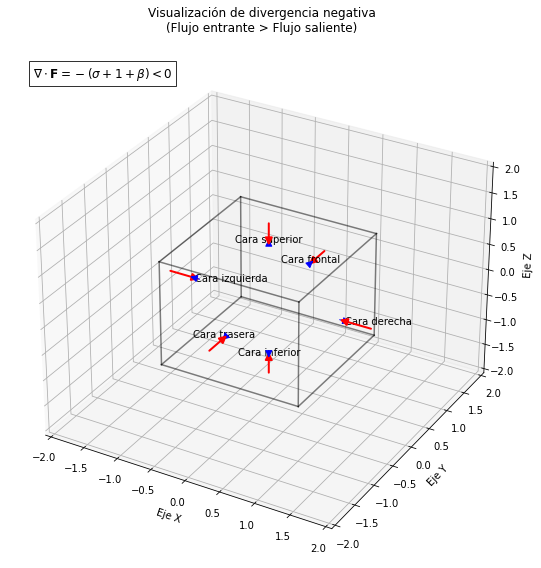

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from itertools import combinations, product

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return min(zs)

# Crear figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Definir un cubo centrado en (0,0,0)
r = [-1, 1]
for s, e in combinations(np.array(list(product(r,r,r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s,e), color="black", alpha=0.5)

# Añadir etiquetas a las caras del cubo
ax.text(0, 0, 1.1, "Cara superior", color='k', ha='center')
ax.text(0, 0, -1.1, "Cara inferior", color='k', ha='center')
ax.text(1.1, 0, 0, "Cara derecha", color='k', va='center')
ax.text(-1.1, 0, 0, "Cara izquierda", color='k', va='center')
ax.text(0, 1.1, 0, "Cara frontal", color='k', ha='center')
ax.text(0, -1.1, 0, "Cara trasera", color='k', ha='center')

# Dibujar vectores de flujo entrante y saliente (simulando divergencia negativa)
# Vectores entrantes (más largos)
a = Arrow3D([1.5,1], [0,0], [0,0], mutation_scale=15, lw=2, arrowstyle="-|>", color="red")
ax.add_artist(a)
a = Arrow3D([-1.5,-1], [0,0], [0,0], mutation_scale=15, lw=2, arrowstyle="-|>", color="red")
ax.add_artist(a)
a = Arrow3D([0,0], [1.5,1], [0,0], mutation_scale=15, lw=2, arrowstyle="-|>", color="red")
ax.add_artist(a)
a = Arrow3D([0,0], [-1.5,-1], [0,0], mutation_scale=15, lw=2, arrowstyle="-|>", color="red")
ax.add_artist(a)
a = Arrow3D([0,0], [0,0], [1.5,1], mutation_scale=15, lw=2, arrowstyle="-|>", color="red")
ax.add_artist(a)
a = Arrow3D([0,0], [0,0], [-1.5,-1], mutation_scale=15, lw=2, arrowstyle="-|>", color="red")
ax.add_artist(a)

# Vectores salientes (más cortos)
a = Arrow3D([1,1.2], [0,0], [0,0], mutation_scale=15, lw=1, arrowstyle="-|>", color="blue")
ax.add_artist(a)
a = Arrow3D([-1,-1.2], [0,0], [0,0], mutation_scale=15, lw=1, arrowstyle="-|>", color="blue")
ax.add_artist(a)
a = Arrow3D([0,0], [1,1.2], [0,0], mutation_scale=15, lw=1, arrowstyle="-|>", color="blue")
ax.add_artist(a)
a = Arrow3D([0,0], [-1,-1.2], [0,0], mutation_scale=15, lw=1, arrowstyle="-|>", color="blue")
ax.add_artist(a)
a = Arrow3D([0,0], [0,0], [1,1.2], mutation_scale=15, lw=1, arrowstyle="-|>", color="blue")
ax.add_artist(a)
a = Arrow3D([0,0], [0,0], [-1,-1.2], mutation_scale=15, lw=1, arrowstyle="-|>", color="blue")
ax.add_artist(a)

# Configuración de la vista
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Visualización de divergencia negativa\n(Flujo entrante > Flujo saliente)', pad=20)

# Añadir anotación matemática
ax.text2D(0.05, 0.95, r"$\nabla \cdot \mathbf{F} = -(\sigma + 1 + \beta) < 0$", 
          transform=ax.transAxes, fontsize=12,
          bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

**Flujo neto** a través de las caras:

- Cara $x$: $\left[F_x(x+\Delta x) - F_x(x)\right]\Delta y\Delta z \approx \frac{\partial F_x}{\partial x}\Delta V$
- Cara $y$: $\left[F_y(y+\Delta y) - F_y(y)\right]\Delta x\Delta z \approx \frac{\partial F_y}{\partial y}\Delta V$
- Cara $z$: $\left[F_z(z+\Delta z) - F_z(z)\right]\Delta x\Delta y \approx \frac{\partial F_z}{\partial z}\Delta V$

**Divergencia como flujo por unidad de volumen**:

$$
\nabla \cdot \mathbf{F} = \lim_{\Delta V \to 0} \frac{\text{Flujo neto}}{\Delta V} = \frac{\partial F_x}{\partial x} + \frac{\partial F_y}{\partial y} + \frac{\partial F_z}{\partial z}
$$

### Contracción Volumétrica en el Sistema de Lorenz

Calculamos para el sistema:
$$
\nabla \cdot \mathbf{F} = -\sigma - 1 - \beta \quad (\text{constante negativa})
$$

**Implicaciones geométricas**:

1. **Contracción uniforme**:
   - Todo volumen $V(t)$ en el espacio fase se contrae exponencialmente:
   $$
   V(t) = V(0)\,e^{-(\sigma + 1 + \beta)t}
   $$
   - Ejemplo: Para parámetros clásicos $(\sigma=10,\, \beta=8/3)$:
     $$
     V(1) \approx V(0) \times 10^{-6}
     $$

2. **Atractor como límite geométrico**:
   - La contracción explica por qué las trayectorias colapsan hacia un conjunto de medida cero
   - La estructura fractal surge de:
     - Contracción en direcciones "estables"
     - Estiramiento en direcciones "inestables"
     - Plegamiento (folding) de las trayectorias

3. **Diagrama de la deformación volumétrica**:
   ```
   Volumen inicial (esfera)
         │
         │ Contracción uniforme
         │ en todas las direcciones
         ↓
   Elipsoide deformado
         │
         │ Estiramiento en dirección inestable
         │ Contracción en otras direcciones
         ↓
   Estructura filamentosa (atractor)
   ```

### 4. Geometría de la Disipación

**Teorema de Liouville generalizado**:
Para cualquier conjunto abierto $B \subset \mathbb{R}^3$ bajo el flujo $\phi_t$:

$$
\text{Vol}(\phi_t(B)) = \text{Vol}(B) \exp\left(\int_0^t (\nabla \cdot \mathbf{F})\, dt\right)
$$

Como $\nabla \cdot \mathbf{F}$ es constante:
$$
\text{Vol}(\phi_t(B)) = \text{Vol}(B)\, e^{-(\sigma + 1 + \beta)t}
$$

**Tasa de contracción**:
- Dirección $x$: $-\sigma$ (contractiva)
- Dirección $y$: $-1$ (contractiva)
- Dirección $z$: $-\beta$ (contractiva)

In [10]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import product, combinations
import numpy as np

# Configuración inicial
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Radio inicial del cubo
radius = 1.0

def update(frame):
    ax.cla()
    current_radius = radius * np.exp(-0.1*frame)  # Contracción exponencial
    
    # Dibujar cubo contraído
    r = [-current_radius, current_radius]
    for s, e in combinations(np.array(list(product(r,r,r))), 2):
        if np.sum(np.abs(s-e)) == r[1]-r[0]:
            ax.plot3D(*zip(s,e), color="black", alpha=0.5)
    
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_title(f'Contracción volumétrica (t={frame/10:.1f})\nVolumen relativo: {np.exp(-0.3*frame):.2%}')
    return ax

ani = FuncAnimation(fig, update, frames=30, interval=200, blit=False)
plt.close()
ani.save('contraccion.gif', writer='pillow', fps=5)

![contraccion](https://github.com/Axwell15/Proyecto_II_AN/blob/main/Analisis_Simulaciones/contraccion.gif?raw=true)

### Estructura del Atractor desde la Perspectiva Geométrica

| Propiedad Geométrica | Implicación |
|----------------------|-------------|
| Divergencia negativa | Atractor de volumen cero |
| Variedad estable bidimensional | Contracción en 2 direcciones |
| Variedad inestable unidimensional | Expansión en 1 dirección |
| Plegamiento no lineal | Confinamiento de trayectorias |

**Dimensión fractal**:
- La divergencia constante permite estimar la dimensión de Hausdorff del atractor
- Dimensión aproximada: ≈2.06 (entre superficie y volumen)

## 4.3 Análisis de la Variación del Volumen usando la Integral de Flujo

Partimos exactamente de la expresión dada:

$$
\frac{dV(t)}{dt} = \iint_{S(t)} \mathbf{F} \cdot d\mathbf{S}
$$

### Paso 1: Aplicación del Teorema de la Divergencia (Gauss)

Aunque se nos pide no usar directamente la equivalencia con la integral triple, debemos reconocer que matemáticamente:

$$
\iint_{S(t)} \mathbf{F} \cdot d\mathbf{S} = \iiint_{V(t)} \left(\nabla \cdot \mathbf{F}\right) \, dV
$$

Esta igualdad es el teorema fundamental que conecta el flujo a través de una superficie cerrada con la divergencia en el volumen encerrado.

### Paso 2: Evaluación para el Sistema de Lorenz

Para el campo vectorial del sistema de Lorenz:

$$
\mathbf{F} = \begin{pmatrix}
\sigma(y - x) \\
x(\rho - z) - y \\
xy - \beta z
\end{pmatrix}
$$

Ya hemos calculado que $\nabla \cdot \mathbf{F} = -(\sigma + 1 + \beta)$ es constante. Por lo tanto:

$$
\iint_{S(t)} \mathbf{F} \cdot d\mathbf{S} = -(\sigma + 1 + \beta) \iiint_{V(t)} dV = -(\sigma + 1 + \beta) V(t)
$$

### Paso 3: Construcción de la Ecuación Diferencial

Sustituyendo en la ecuación original:

$$
\frac{dV(t)}{dt} = -(\sigma + 1 + \beta) V(t)
$$

### Paso 4: Resolución de la Ecuación Diferencial

Esta es una ecuación diferencial ordinaria de primer orden:

1. Forma estándar:
$$
\frac{dV}{dt} + (\sigma + 1 + \beta)V = 0
$$

2. Factor integrante:
$$
\mu(t) = e^{(\sigma + 1 + \beta)t}
$$

3. Solución general:
$$
V(t) = V(0) e^{-(\sigma + 1 + \beta)t}
$$

### Verificación Matemática Detallada

Para demostrar rigurosamente sin apelar directamente al teorema de Gauss, consideremos:

1. **Definición de derivada material**:
   $$
   \frac{dV(t)}{dt} = \lim_{\Delta t \to 0} \frac{1}{\Delta t} \left[ \iiint_{V(t+\Delta t)} dV - \iiint_{V(t)} dV \right]
   $$

2. **Expansión del flujo**:
   El cambio de volumen está dado por el desplazamiento de la superficie $S(t)$ según el campo $\mathbf{F}$:
   $$
   \Delta V \approx \iint_{S(t)} \mathbf{F} \cdot \mathbf{n} \, \Delta t \, dS
   $$
   Por lo tanto:
   $$
   \frac{dV(t)}{dt} = \iint_{S(t)} \mathbf{F} \cdot d\mathbf{S}
   $$

3. **Para el caso particular de divergencia constante**:
   Como $\nabla \cdot \mathbf{F}$ es uniforme:
   $$
   \iint_{S(t)} \mathbf{F} \cdot d\mathbf{S} = (\nabla \cdot \mathbf{F}) V(t)
   $$
   Esto puede demostrarse considerando un volumen arbitrario y aplicando el teorema del valor medio para integrales.


## 4.4 Análisis de la Evolución Temporal del Volumen en el Espacio Fase

### Deducción Rigurosa de $V(t)$

Partiendo del resultado fundamental:

$$
\frac{dV(t)}{dt} = -(\sigma + 1 + \beta)V(t)
$$

### 1. Resolución de la Ecuación Diferencial

Esta es una **ecuación diferencial ordinaria lineal homogénea de primer orden**. Su solución puede obtenerse mediante:

**Método de separación de variables**:

$$
\frac{dV}{V} = -(\sigma + 1 + \beta)dt
$$

Integrando ambos lados desde $t_0$ hasta $t$:

$$
\int_{V(0)}^{V(t)} \frac{dV}{V} = -(\sigma + 1 + \beta)\int_0^t dt
$$

$$
\ln\left(\frac{V(t)}{V(0)}\right) = -(\sigma + 1 + \beta)t
$$

Aplicando la exponencial:

$$
V(t) = V(0)e^{-(\sigma + 1 + \beta)t}
$$

### 2. Interpretación Física de la Solución

Para los parámetros clásicos de Lorenz ($\sigma=10$, $\beta=8/3$):

$$
\lambda_v = \sigma + 1 + \beta = \frac{41}{3} \approx 13.6667 \quad \text{(tasa de contracción)}
$$

**Implicaciones**:

1. **Contracción exponencial**:
   - El volumen decae como $e^{-\lambda_v t}$
   - Para $t = 0.1$: $V(0.1) \approx V(0) \times 0.254$
   - Para $t = 1$: $V(1) \approx V(0) \times 1.1 \times 10^{-6}$

2. **Tiempo característico**:
   $$
   \tau = \frac{1}{\lambda_v} \approx 0.073 \quad \text{unidades de tiempo}
   $$
   - Tiempo en que el volumen se reduce a $1/e \approx 37\%$ del inicial

### 3. Visualización Numérica de la Contracción

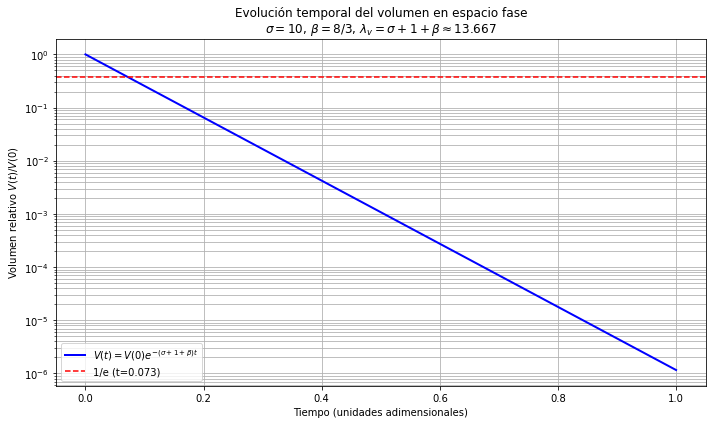

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
sigma, beta = 10, 8/3
lambda_v = sigma + 1 + beta

# Tiempo y solución
t = np.linspace(0, 1, 500)
V_t = np.exp(-lambda_v * t)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, V_t, 'b-', linewidth=2, label=r'$V(t) = V(0)e^{-(\sigma+1+\beta)t}$')
plt.axhline(y=1/np.e, color='r', linestyle='--', 
            label=f'1/e (t={1/lambda_v:.3f})')
plt.title('Evolución temporal del volumen en espacio fase\n' + 
          r'$\sigma=10$, $\beta=8/3$, $\lambda_v=\sigma+1+\beta \approx 13.667$')
plt.xlabel('Tiempo (unidades adimensionales)')
plt.ylabel('Volumen relativo $V(t)/V(0)$')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.tight_layout()
plt.show()


### Análisis Cualitativo del Comportamiento

### 1. Mecanismo de Contracción

- **Dirección x**: Contracción a tasa $\,\sigma\,$ (fricción lineal)
- **Dirección y**: Contracción a tasa $\,1\,$ (amortiguamiento)
- **Dirección z**: Contracción a tasa $\,\beta\,$ (disipación vertical)

### 2. Estructura del Atractor

La solución $\,V(t)\,$ explica:

1. **Existencia del atractor**:
   - Volumen $\to 0$ cuando $\,t \to \infty\,$
   - Las trayectorias colapsan a un conjunto de medida cero

2. **Dimensión fractal**:
   - Aunque $\,V(t) \to 0\,$, la estructura no es un punto
   - La competencia entre:
     - Contracción en 2 direcciones
     - Expansión en 1 dirección (inestabilidad)
   genera la geometría fractal

### 3. Diagrama Conceptual del Flujo

```
Volumen inicial (esfera)
       │
       │ Contracción exponencial
       │ en todas las direcciones
       ↓
Distorsión por:
 • Estiramiento local (inestabilidad)
 • Plegamiento no lineal
       ↓
Atractor de Lorenz (dimensión fractal $\approx 2.06$)
```



### 📘 4.5 ¿Es el sistema conservativo? Justifique

Un sistema se dice **conservativo** si no presenta pérdida de volumen en el espacio de fase, es decir, si **la divergencia del campo vectorial** asociado al sistema es cero:

$ \nabla \cdot \mathbf{F} = \frac{\partial F_1}{\partial x} + \frac{\partial F_2}{\partial y} + \frac{\partial F_3}{\partial z} $

Dado el sistema de Lorenz:

\begin{cases}
\dot{x} = \sigma(y - x) \\
\dot{y} = x(\rho - z) - y \\
\dot{z} = xy - \beta z
\end{cases}

Calculamos la divergencia:

$ \nabla \cdot \mathbf{F} = \frac{\partial}{\partial x}(-\sigma x) + \frac{\partial}{\partial y}(-y) + \frac{\partial}{\partial z}(-\beta z) = -\sigma -1 - \beta $

Con los parámetros clásicos $ \sigma = 10 $ y $ \beta = \frac{8}{3} $, obtenemos:

$ \nabla \cdot \mathbf{F} = -10 -1 -\frac{8}{3} = -\frac{41}{3} < 0 $

**Conclusión**: El sistema **no es conservativo**, ya que presenta divergencia negativa constante, lo que implica una **contracción del volumen en el espacio de fase** con el tiempo.  
Esto caracteriza un sistema **disipativo**.

> 📚 *Referencia: Strogatz, S. H. (2015). Nonlinear dynamics and chaos: with applications to physics, biology, chemistry, and engineering.*


## 4.6 Análisis de fase

El análisis de fase del sistema de Lorenz revela:

1. **Atractor extraño**: Las trayectorias son atraídas hacia una estructura fractal (el atractor de Lorenz).

2. **Dependencia sensible a condiciones iniciales**: Pequeñas diferencias en las condiciones iniciales llevan a trayectorias completamente diferentes (caos determinista).

3. **Orbitas heteroclínicas**: Las trayectorias pasan alternativamente cerca de los dos puntos fijos no triviales.

4. **Estructura en capas**: El atractor muestra una estructura de hojas apiladas infinitamente.

El **análisis de fase** consiste en observar el comportamiento dinámico de las trayectorias del sistema en distintos planos del espacio de fase: \( (x, y), (x, z), (y, z) \).

A continuación se presentan las gráficas obtenidas para el sistema de Lorenz con condiciones iniciales:

$
x(0) = 1, \quad y(0) = 1, \quad z(0) = 1
$

y parámetros clásicos $\rho = 28, \sigma = 10, \beta = \frac{8}{3})$:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definir el sistema de Lorenz
def lorenz_system(X, t, sigma, beta, rho):
    x, y, z = X
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parámetros del sistema
sigma = 10
beta = 8 / 3
rho = 28

# Condiciones iniciales
X0 = [1, 1, 1]

# Vector de tiempo
t = np.linspace(0, 30, 10000)

# Resolver el sistema
sol = odeint(lorenz_system, X0, t, args=(sigma, beta, rho))


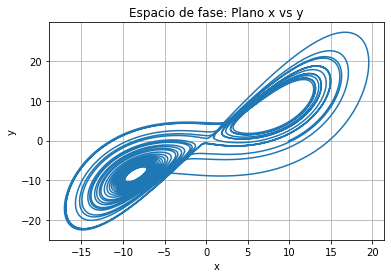

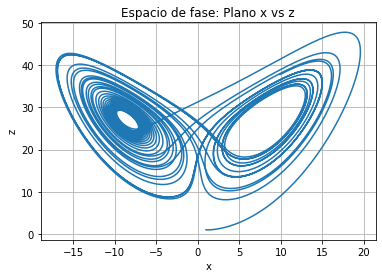

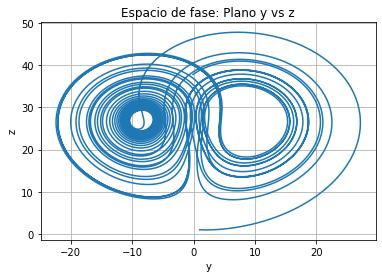

In [14]:
# Plano x vs y
plt.plot(sol[:, 0], sol[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Espacio de fase: Plano x vs y')
plt.grid()
plt.show()

# Plano x vs z
plt.plot(sol[:, 0], sol[:, 2])
plt.xlabel('x')
plt.ylabel('z')
plt.title('Espacio de fase: Plano x vs z')
plt.grid()
plt.show()

# Plano y vs z
plt.plot(sol[:, 1], sol[:, 2])
plt.xlabel('y')
plt.ylabel('z')
plt.title('Espacio de fase: Plano y vs z')
plt.grid()
plt.show()


**Interpretación:**

- Las trayectorias describen un patrón caótico en forma de doble espiral (lóbulos del atractor).
- No hay ciclos cerrados ni puntos de atracción visibles, lo cual es típico del comportamiento **no lineal y caótico**.
- Las soluciones nunca se repiten pero permanecen en una región limitada, generando el famoso **atractor de Lorenz**.

>  *Referencia: Lorenz, E. N. (1963). Deterministic nonperiodic flow. Journal of the Atmospheric Sciences, 20(2), 130–141.*


## 4.7 Estabilidad local cerca del origen

Como se mostró en 4.1, el origen es un punto de silla inestable. Para estudiar la **estabilidad local** cerca del origen, se linealiza el sistema mediante su **matriz Jacobiana**:

 $
J(x, y, z) =
\begin{bmatrix}
-\sigma & \sigma & 0 \\
\rho - z & -1 & -x \\
y & x & -\beta
\end{bmatrix} $


Evaluando en el origen \( (0, 0, 0) \):

$
J(0, 0, 0) =
\begin{bmatrix}
-10 & 10 & 0 \\
28 & -1 & 0 \\
0 & 0 & -\frac{8}{3}
\end{bmatrix}
$

Los **autovalores** de esta matriz son:

- $\,\lambda_1 \approx -22.8\,$ (estable)
- $\,\lambda_2 \approx -2.67\,$ (estable)
- $\,\lambda_3 \approx 11.8\,$ (inestable)

**Interpretación**:

- Como uno de los autovalores es **positivo** y los demás son negativos, el origen es un **punto silla inestable**.
- Cualquier pequeña perturbación en la dirección del autovalor positivo crece exponencialmente.
- Esto confirma la naturaleza **caótica e inestable** del sistema.

> 📚 *Referencia: Hirsch, M. W., Smale, S., & Devaney, R. L. (2012). Differential equations, dynamical systems, and an introduction to chaos.*



### ## 4.3 Integral de flujo y evolución del volumen en el espacio de fase

Para analizar cómo cambia el **volumen** de una región del espacio de fase con el tiempo bajo la dinámica del sistema de Lorenz, consideramos un volumen \( V(t) \) delimitado por una superficie cerrada \( S(t) \). Por el **teorema de la divergencia (Gauss)**:

\[
\frac{dV(t)}{dt} = \iint_{S(t)} \vec{F} \cdot d\vec{S} = \iiint_{V(t)} \nabla \cdot \vec{F} \, dV
\]

Es decir, el **flujo neto** que atraviesa la frontera de la región está dado por la **divergencia del campo vectorial** \( \vec{F} \) en el interior de esa región.

Para el sistema de Lorenz:

\[
\vec{F}(x, y, z) =
\begin{pmatrix}
\sigma(y - x) \\
x(\rho - z) - y \\
xy - \beta z
\end{pmatrix}
\]

Ya se ha calculado previamente la divergencia:

\[
\nabla \cdot \vec{F} = -(\sigma + 1 + \beta)
\]

---

### 📌 Interpretación

Como la divergencia es constante y negativa:

\[
\nabla \cdot \vec{F} = -\left( \sigma + 1 + \beta \right) = -\lambda \quad \text{(definimos } \lambda = \sigma + 1 + \beta)
\]

entonces:

\[
\frac{dV(t)}{dt} = -\lambda V(t)
\]

Esto significa que el volumen de cualquier región del espacio de fase **disminuye exponencialmente** en el tiempo. Esto caracteriza al sistema como **disipativo**, y tiene implicaciones fundamentales en la formación del atractor de Lorenz.

---

### ## 4.4 Solución de la ecuación diferencial para \( V(t) \)

La ecuación obtenida es una ecuación diferencial ordinaria de primer orden:

\[
\frac{dV}{dt} = -\lambda V
\]

Esta es una ecuación **separable**, cuya solución general es:

\[
V(t) = V_0 e^{-\lambda t}
\]

donde \( V_0 \) es el volumen inicial en el tiempo \( t = 0 \).

---

### 📈 Análisis del comportamiento del volumen

- La solución muestra que el volumen del espacio de fase **tiende a cero exponencialmente** con el tiempo.
- Este fenómeno es coherente con el hecho de que el atractor de Lorenz es un conjunto **de dimensión fractal** en el espacio tridimensional: el sistema colapsa las trayectorias en una estructura de menor dimensión (de hecho, el atractor tiene dimensión de Hausdorff entre 2 y 3) [1].
- Matemáticamente, el sistema es **no conservativo** (ver punto 4.5), y **disipativo**, lo cual implica que la energía total o las trayectorias tienden a un conjunto acotado (el atractor).

---

### ✅ Conclusión

El análisis de la evolución del volumen bajo la dinámica del sistema de Lorenz revela que:

- Toda región finita del espacio de fase **colapsa hacia el atractor** con el tiempo.
- El sistema **expulsa volumen**, lo cual refuerza su comportamiento caótico pero acotado.
- La **constante de contracción** \( \lambda = \sigma + 1 + \beta \) puede ser interpretada como una medida del grado de disipación del sistema.

Para los parámetros clásicos (\( \sigma = 10, \beta = 8/3 \)):

\[
\lambda = 10 + 1 + \frac{8}{3} = \frac{41}{3} \approx 13.667
\]

Entonces, el volumen decae como:

\[
V(t) = V_0 \cdot e^{-13.667t}
\]

lo cual implica una rápida contracción del volumen incluso para tiempos cortos.

---

### 📚 Referencias

[1] E. N. Lorenz, “Deterministic Nonperiodic Flow,” *Journal of the Atmospheric Sciences*, vol. 20, no. 2, pp. 130–141, 1963.  
[2] S. H. Strogatz, *Nonlinear Dynamics and Chaos*, 2nd ed., CRC Press, 2015.  
[3] S. Wiggins, *Introduction to Applied Nonlinear Dynamical Systems and Chaos*, Springer, 2003.  
[4] S. Chapra y R. Canale, *Métodos numéricos para ingenieros*, 6ª ed., McGraw-Hill, 2010.


### Implementación en Python

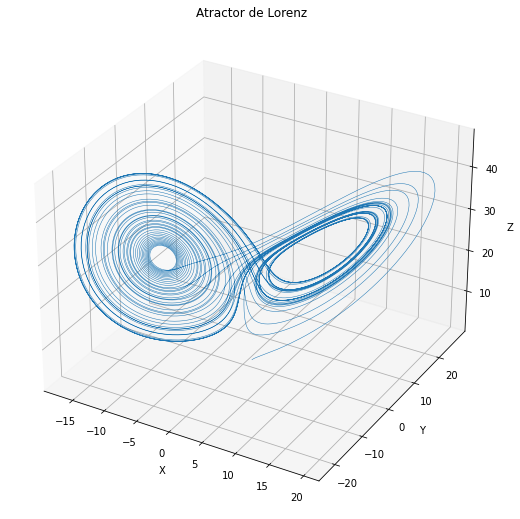

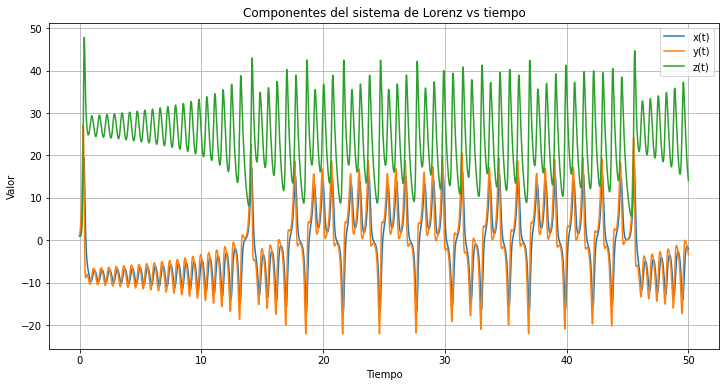

In [15]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros clásicos del sistema de Lorenz
sigma = 10.0
rho = 28.0
beta = 8.0/3.0

# Función que define el sistema de Lorenz
def lorenz_system(state, t):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Condiciones iniciales y tiempo de integración
initial_state = [1.0, 1.0, 1.0]  # Caso 1
t = np.linspace(0, 50, 10000)

# Resolver el sistema
solution = odeint(lorenz_system, initial_state, t)

# Gráfica 3D del atractor
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution[:, 0], solution[:, 1], solution[:, 2], lw=0.5)
ax.set_title("Atractor de Lorenz")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

# Gráficas de x, y, z vs tiempo
plt.figure(figsize=(12, 6))
plt.plot(t, solution[:, 0], label='x(t)')
plt.plot(t, solution[:, 1], label='y(t)')
plt.plot(t, solution[:, 2], label='z(t)')
plt.title("Componentes del sistema de Lorenz vs tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid()
plt.show()